## LAB con Ioannis 22/11

In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW4/bank_transactions.csv')

In [125]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [126]:
# Spoiler per le prossime domande

# We want to identify the feature which brings the majority of variation.
# Maybe we should also normalize, for example if we want to compute the euclidean distance between distance -> polar distance (-1, +1). There are also other distances: Manhattan, 

### Data Cleaning

In [6]:
data.info()

# We need to convert the DateOfBirth and the TransactionData as date objects, same for TransactionTime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [7]:
# We rename the last column to simplify:

data.rename(columns = {'TransactionAmount (INR)':'TransactionAmount'}, inplace = True)

In [129]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### Missing values

In [130]:
print(data.isna().sum())
print('*********************************')
print('*********************************')
print('The total number of rows is: ',len(data))

# Since the number of Missing Values is pretty low, we can drop the rows that contain NaN's.

TransactionID            0
CustomerID               0
CustomerDOB           3397
CustGender            1100
CustLocation           151
CustAccountBalance    2369
TransactionDate          0
TransactionTime          0
TransactionAmount        0
dtype: int64
*********************************
*********************************
The total number of rows is:  1048567


In [8]:
data.dropna(inplace = True) # tanto sono poche

In [132]:
print(data.columns)

data[['CustAccountBalance', 'TransactionAmount']].describe()

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount'],
      dtype='object')


,CustAccountBalance,TransactionAmount
count,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.566096e+03
std,8.467609e+05,6.561464e+03
min,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.600000e+02
50%,1.676852e+04,4.575000e+02
75%,5.742885e+04,1.200000e+03
max,1.150355e+08,1.560035e+06


In [9]:
# There are Transactions of 0! This makes no sense, so we want to delete them:

data = data[data['TransactionAmount'] != 0]

In [10]:
# I want to know if CustomerID has some repetead values:
print(data['CustomerID'].nunique())
print(len(data))
print('There are', len(data) - data['CustomerID'].nunique(), 'values that are present more than one time')

878763
1040794
There are 162031 values that are present more than one time


### Date

In [6]:
# We want to convert DateOfBirth, TransactionDate and TransactionTime in a datetime format

from datetime import datetime

data.dropna(inplace=True)
data.CustomerDOB = pd.to_datetime(data.CustomerDOB) 
data.TransactionDate = pd.to_datetime(data.TransactionDate) 
#data.TransactionTime = data.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S'))
data.TransactionTime = pd.to_datetime(data.TransactionTime) 

<AxesSubplot:>

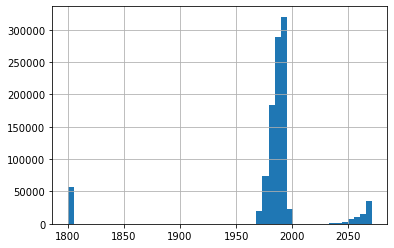

In [137]:
data.CustomerDOB.dt.year.hist(bins = 50)

In [138]:
# This is obviously very strane, but let's see:
print('Years of births are up to', max(data.CustomerDOB.dt.year))

print('For people born in the XX century, dates start from', min(data['CustomerDOB'][data.CustomerDOB.dt.year > 1850]))

# Therefore, it would appear that people born before 1972 were reported as born after 2000. 

Years of births are up to 2071
For people born in the XX century, dates start from 1972-01-01 00:00:00


<AxesSubplot:>

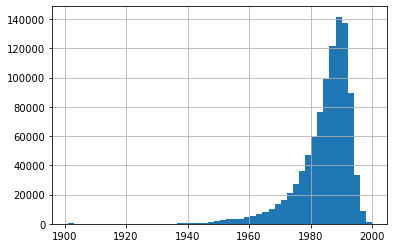

In [12]:
# To fix this error, we execute:
data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] - pd.DateOffset(years = 100)

# Then, we remove observations from 1800's:
data.drop(data[data.CustomerDOB.dt.year <= 1805].index, axis = 0, inplace = True)

# and finally we have:
data.CustomerDOB.dt.year.hist(bins = 50)

In [140]:
# Now, since life expectancy at birth in India is 69 years for women and 68 years for men, probably we have some problems with that left tail in the histogram... we decided to drop the rows for users with more tan 100 years, because they probably result from some errors in data transcription. Since the dataset refers to the 2016, we cut observations where DOB.year is < 1916, that are 616 rows

#data = data.drop(data[data.CustomerDOB.dt.year < 1916].index)

In [141]:
# Now, we have some data regardin the early 1900's, while the life expectancy at birth in India is 69 years for women and 68 years for men. Somethins is not working... Also, see how the shape of the histogram abruptly stops at the beginning of the new millennium. Making similar reasoning to that seen above:

print('Years of births stops in', max(data.CustomerDOB.dt.year), '...')
print('But note that we have some very early observstions, starting from', min(data['CustomerDOB'][data.CustomerDOB.dt.year < 1915]), '!')
print('So, we move those observations like we did before!')

Years of births stops in 2000 ...
But note that we have some very early observstions, starting from 1901-01-01 00:00:00 !
So, we move those observations like we did before!


<BarContainer object of 16 artists>

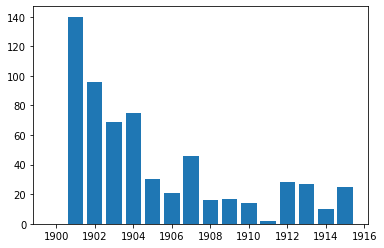

In [13]:
import matplotlib.pyplot as plt

years = []
number = []
for i in range(1900, 1916):
    years.append(i)
    number.append(len(data[data.CustomerDOB.dt.year == i]))

plt.bar(years, number)

# sembrerebbe che fino al 1906 ci siano degli errori, e guarda caso in india sopra i 10 anni puoi aprire un conto! quindi ha senso che ci siano persone nate tra il 2000 e il 2006!

In [14]:
data.loc[data.CustomerDOB.dt.year <= 1906, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year <= 1906, 'CustomerDOB'] + pd.DateOffset(years = 100)

<AxesSubplot:>

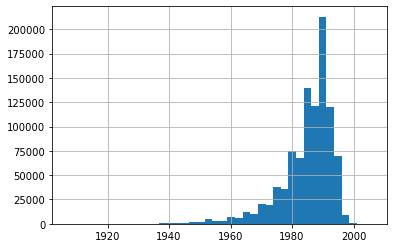

In [15]:
# Now the distribution of age looks like this:
data.CustomerDOB.dt.year.hist(bins = 40)

In [145]:
min(data.CustomerDOB)

Timestamp('1907-02-01 00:00:00')

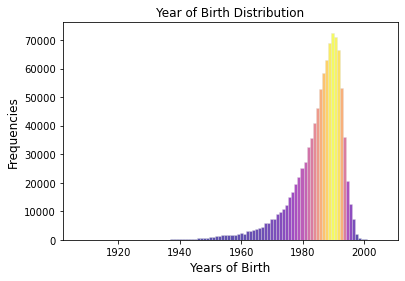

In [7]:
# Now the distribution of age looks like this (with a nicer plot):
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(data.CustomerDOB.dt.year, bins=100, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.plasma(n[i]/max(n)))

plt.title('Year of Birth Distribution', fontsize=12)
plt.xlabel('Years of Birth', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.show()

In [147]:
#from datetime import datetime

#data.TransactionTime = data.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S'))

### Transactions

<AxesSubplot:ylabel='Frequency'>

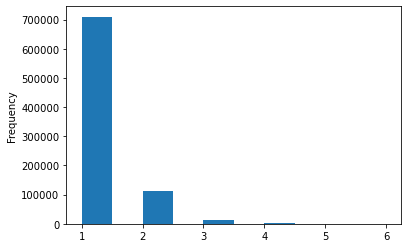

In [148]:
data.groupby('CustomerID').TransactionID.count().plot.hist()

### Age

In [16]:
import numpy as np

data['CustomerAge'] = (round((pd.to_datetime('today') - data.CustomerDOB)/np.timedelta64(1, 'Y'), 0)).astype(int)
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,1900-01-01 14:32:07,25.0,28
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,1900-01-01 14:18:58,27999.0,66
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,1900-01-01 14:27:12,459.0,26
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,1900-01-01 14:27:14,2060.0,49
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,1900-01-01 18:11:56,1762.5,35


In [118]:
data['CustomerAge'].nunique()

98

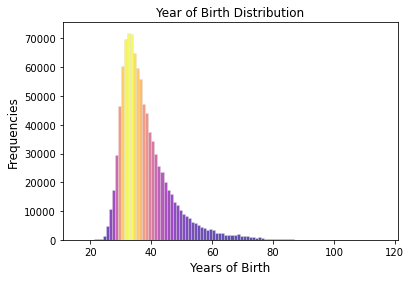

In [150]:
n, bins, patches = plt.hist(data.CustomerAge, bins=100, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.plasma(n[i]/max(n)))

plt.title('Year of Birth Distribution', fontsize=12)
plt.xlabel('Years of Birth', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.show()

# Average age in India: 29 years!

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984614 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   TransactionID       984614 non-null  object        
 1   CustomerID          984614 non-null  object        
 2   CustomerDOB         984614 non-null  datetime64[ns]
 3   CustGender          984614 non-null  object        
 4   CustLocation        984614 non-null  object        
 5   CustAccountBalance  984614 non-null  float64       
 6   TransactionDate     984614 non-null  datetime64[ns]
 7   TransactionTime     984614 non-null  datetime64[ns]
 8   TransactionAmount   984614 non-null  float64       
 9   CustomerAge         984614 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 82.6+ MB


In [17]:
# Now we save it, to simplify the loading for the next runs

import os

data.to_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW4/data.csv') 

# 2. Grouping customers together!

## 2.1 Getting your data + feature engineering

In [3]:
data = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW4/data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984614 entries, 0 to 984613
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       984614 non-null  object 
 1   CustomerID          984614 non-null  object 
 2   CustomerDOB         984614 non-null  object 
 3   CustGender          984614 non-null  object 
 4   CustLocation        984614 non-null  object 
 5   CustAccountBalance  984614 non-null  float64
 6   TransactionDate     984614 non-null  object 
 7   TransactionTime     984614 non-null  object 
 8   TransactionAmount   984614 non-null  float64
 9   CustomerAge         984614 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 75.1+ MB


In [4]:
from datetime import datetime

data.CustomerDOB = pd.to_datetime(data.CustomerDOB) 
data.TransactionDate = pd.to_datetime(data.TransactionDate) 
data.TransactionTime = pd.to_datetime(data.TransactionTime) 

### 2.1.1 & 2.1.2: 2.1 Getting your data + feature engineering

In [5]:
# Number of transactions

data_num_trans = pd.DataFrame(data.groupby(["CustomerID"])["TransactionID"].count().reset_index(name="Number_Transactions"))
data_small = data_num_trans

In [643]:
data_num_trans

,CustomerID,Number_Transactions
0,C1010011,2
1,C1010012,1
2,C1010014,2
3,C1010018,1
4,C1010024,1
...,...,...
838556,C9099836,1
838557,C9099877,1
838558,C9099919,1
838559,C9099941,1


In [6]:
# Number of transactions with a balance bigger than 100 USD

# Since we have the transaction amount in INR (indian rupies) we have to search the transaction > 8163,85 INR

data_100 = data.groupby(['CustomerID']).apply(  lambda x:  x[x['TransactionAmount'] > 81638,50]['TransactionAmount'].count()  ).reset_index(name="Number_Transactions>100")
data_100

InvalidIndexError: (31336     False
162622    False
Name: TransactionAmount, dtype: bool, 50)

In [157]:
# Average amount of transaction

data_average_trans = data.groupby(["CustomerID"])["TransactionAmount"].mean().reset_index(name="Average_Amount_Transactions")
data_average_trans

,CustomerID,Average_Amount_Transactions
0,C1010011,2553.0
1,C1010012,1499.0
2,C1010014,727.5
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
838556,C9099836,691.0
838557,C9099877,222.0
838558,C9099919,126.0
838559,C9099941,50.0


In [158]:
# Average balance

data_average_balance = data.groupby(["CustomerID"])["CustAccountBalance"].mean().reset_index(name="Average_Balance")
data_average_balance

,CustomerID,Average_Balance
0,C1010011,76340.635
1,C1010012,24204.490
2,C1010014,100112.950
3,C1010018,496.180
4,C1010024,87058.650
...,...,...
838556,C9099836,133067.230
838557,C9099877,96063.460
838558,C9099919,5559.750
838559,C9099941,35295.920


In [125]:
# Average difference between the balance and the transaction amount for each customer (Utilisation)

data['Utilisation'] = data['CustAccountBalance'] - data['TransactionAmount']
data_utilisation = pd.DataFrame(data.groupby(['CustomerID'])['Utilisation'].mean())
data_utilisation = data_utilisation.reset_index() 
data_utilisation

,CustomerID,Utilisation
0,C1010011,73787.635
1,C1010012,22705.490
2,C1010014,99385.450
3,C1010018,466.180
4,C1010024,82058.650
...,...,...
838556,C9099836,132376.230
838557,C9099877,95841.460
838558,C9099919,5433.750
838559,C9099941,35245.920


In [160]:
# Most common gender of the customer
data_gender = pd.DataFrame(data.groupby(['CustomerID'])['CustGender'].agg(lambda x: pd.Series.mode(x)))

In [161]:
for idx in data_gender.index:
    data_gender.loc[idx] = data_gender.loc[idx][0][0]

In [162]:
data_gender = data_gender.reset_index() 
data_gender

,CustomerID,CustGender
0,C1010011,F
1,C1010012,M
2,C1010014,F
3,C1010018,F
4,C1010024,M
...,...,...
838556,C9099836,M
838557,C9099877,M
838558,C9099919,M
838559,C9099941,M


In [163]:
# Most common location of the customer
data_location = data.groupby(['CustomerID'])['CustLocation'].agg(lambda x: pd.Series.mode(x)) # group by 

data_location = pd.DataFrame(data_location)

In [164]:
for idx in data_location.index:
    if (len(data_location.loc[idx][0]) == 2 or len(data_location.loc[idx][0]) == 3 or len(data_location.loc[idx][0]) == 4): # 2 or 3 because there are examples where the mode has 2 (bimodal) or 3 values. When this happen, we take the first occurence
        data_location.loc[idx] = data_location.loc[idx][0][0]
        #print(data_location.loc[idx][0][0])

data_location = pd.DataFrame(data_location)
data_location = data_location.reset_index() 
data_location

,CustomerID,CustLocation
0,C1010011,NEW DELHI
1,C1010012,MUMBAI
2,C1010014,MUMBAI
3,C1010018,CHAMPARAN
4,C1010024,KOLKATA
...,...,...
838556,C9099836,BHIWANDI
838557,C9099877,BANGALORE
838558,C9099919,GUNTUR
838559,C9099941,CHENNAI


In [183]:
# Let's merge them togheter. We check they have the same number of rows:
print(len(data_num_trans))
print(len(data_100))
print(len(data_average_trans))
print(len(data_average_balance))
print(len(data_utilisation))
print(len(data_gender))
print(len(data_location))

# Perfect. Now we can merge them togheter:
# First of all, we convert them in a pandas DataFrame:
one_col_data = [data_num_trans, data_100, data_average_trans, data_average_balance, data_utilisation, data_gender, data_location]

for dataset in one_col_data:
    dataset = pd.DataFrame(dataset)

# Now we create a new dataset:
data_small['Number_Transactions>100'] = data_100['Number_Transactions>100']
data_small['Average_Amount_Transactions'] = data_average_trans['Average_Amount_Transactions']
data_small['Average_Balance'] = data_average_balance['Average_Balance']
data_small['Utilisation'] = data_utilisation['Utilisation']
data_small['CustGender'] = data_gender['CustGender']
data_small['CustLocation'] = data_location['CustLocation']

data_small.head()

838561
838561
838561
838561
838561
838561
838561


,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation
0,C1010011,2,2,2553.0,76340.635,73787.635,F,NEW DELHI
1,C1010012,1,1,1499.0,24204.490,22705.490,M,MUMBAI
2,C1010014,2,2,727.5,100112.950,99385.450,F,MUMBAI
3,C1010018,1,0,30.0,496.180,466.180,F,CHAMPARAN
4,C1010024,1,1,5000.0,87058.650,82058.650,M,KOLKATA


In [184]:
data_small.to_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/data_small.csv') 

### 2.1.3. Add 20 more features

In [7]:
data_small = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW4/data_small.csv')
data_small = data_small.drop('Unnamed: 0', axis=1)
data_small.head()

,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation
0,C1010011,2,2,2553.0,76340.635,73787.635,F,NEW DELHI
1,C1010012,1,1,1499.0,24204.490,22705.490,M,MUMBAI
2,C1010014,2,2,727.5,100112.950,99385.450,F,MUMBAI
3,C1010018,1,0,30.0,496.180,466.180,F,CHAMPARAN
4,C1010024,1,1,5000.0,87058.650,82058.650,M,KOLKATA


In [8]:
data_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838561 entries, 0 to 838560
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CustomerID                   838561 non-null  object 
 1   Number_Transactions          838561 non-null  int64  
 2   Number_Transactions>100      838561 non-null  int64  
 3   Average_Amount_Transactions  838561 non-null  float64
 4   Average_Balance              838561 non-null  float64
 5   Utilisation                  838561 non-null  float64
 6   CustGender                   838561 non-null  object 
 7   CustLocation                 838561 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 51.2+ MB


In [30]:
# Maximum transaction (1/20):
data_small["Max_Amount_Transactions"] = data.groupby(["CustomerID"])["TransactionAmount"].max().reset_index(name="Max_Amount_Transactions")['Max_Amount_Transactions']

In [31]:
# Minimum transaction (2/20):
data_small["Min_Amount_Transactions"] = data.groupby(["CustomerID"])["TransactionAmount"].min().reset_index(name="Min_Amount_Transactions")['Min_Amount_Transactions']

In [32]:
data[data['CustomerID'] == 'C1010011'] # C1010014

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustomerAge
31336,T33671,C1010011,1992-08-19,F,NOIDA,32500.73,2016-09-26,1900-01-01 12:38:13,4750.0,30
162622,T173509,C1010011,1983-05-08,M,NEW DELHI,120180.54,2016-09-08,1900-01-01 01:12:29,356.0,40


In [33]:
# Customer Age (we consider the first value in the dataset) --> TODO: take the most common value, it takes too long (3/20):
data_age = pd.DataFrame(data.groupby(['CustomerID'])['CustomerAge'].first())
data_age = data_age.reset_index() 
data_small['Customer_Age'] = data_age['CustomerAge']

In [34]:
# Max Percentage Transaction (4/20):
data_small['Max_%_Transaction'] = round(data_small['Max_Amount_Transactions'] / data_small['Average_Balance'] * 100, 2)

In [35]:
# Last Transaction Date (5/20):
data_last_trans = pd.DataFrame(data.groupby(['CustomerID'])['TransactionDate'].max())
data_last_trans = data_last_trans.reset_index()
data_small['Last_Transaction'] = data_last_trans['TransactionDate']

In [36]:
# Last Transaction Day (6/20):
data_small['Last_Day_Transaction'] = data_small.Last_Transaction.dt.day_name()

In [43]:
# Minimum Account Balance (7/20)
data_min_balance = data.groupby(["CustomerID"])["CustAccountBalance"].min().reset_index(name="Minimum_Balance")
data_small['Minimum_Balance'] = data_min_balance['Minimum_Balance']

In [45]:
# Number of transactions with a balance bigger than 1000 USD (8/20)

data_1000 = data.groupby(['CustomerID']).apply(  lambda x:  x[x['TransactionAmount'] > 81638,50]['TransactionAmount'].count()  ).reset_index(name="Number_Transactions>1000")

# 3m 16s

NameError: name 'data_100' is not defined

In [47]:
data_small['Number_Transactions>1000'] = data_1000['Number_Transactions>1000'] # TODO: metti nella cella sopra

In [112]:
# Last Transaction Hour (//20):

'''
import itertools
last_hour_trans = []

for id, date in itertools.product(data_small['CustomerID'], data_small['Last_Transaction']):
    if((data['CustomerID'] == id) & (data['TransactionDate'] == date)).any():
        last_hour_trans.append(data[ (data['CustomerID'] == id) & (data['TransactionDate'] == date)]['TransactionTime'].dt.hour.item())



for id in data_small['CustomerID']:
    #print(id)
    for date in data_small[data_small['CustomerID'] == id]['Last_Transaction']:
        #print(date)
        last_hour_trans.append( data[ (data['CustomerID'] == id) & (data['TransactionDate'] == date) ]['TransactionTime'].dt.hour)
        

data_small['Last_Hour_Trans'] = last_hour_trans
'''

KeyboardInterrupt: 

In [110]:
#if ((data['CustomerID'] == 'C1010024') & (data['TransactionDate'] == '2016-08-18')).any():
    #print('YES')

data[ (data['CustomerID'] == 'C1010024') & (data['TransactionDate'] == '2016-08-18') ]['TransactionTime'].dt.hour.item()

14

In [118]:
# Last Transaction Month (9/20):

data_small['Last_Month_Transaction'] = data_small.Last_Transaction.dt.month

In [120]:
# Maximum Account Balance (10/20)
data_min_balance = data.groupby(["CustomerID"])["CustAccountBalance"].max().reset_index(name="Maximum_Balance")
data_small['Maximum_Balance'] = data_min_balance['Maximum_Balance']

In [ ]:
''' 
# Day-Period Last Transaction (//20):
fun = lambda x : 'Morning' if x.dt.hour in range(5, 15) elif ('AFternoon' if x in range(16, 19) else 'Night')
'''

In [128]:
# Minimum Utilisation (11/20):
data_min_utilisation = data.groupby(["CustomerID"])["Utilisation"].min().reset_index(name="Minimum_Utilisation")
data_small['Minimum_utilisation'] = data_min_utilisation["Minimum_Utilisation"]

In [132]:
data_small.head()

,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation,Max_Amount_Transactions,Min_Amount_Transactions,Customer_Age,Max_%_Transaction,Last_Transaction,Last_Day_Transaction,Minimum_Balance,Number_Transactions>1000,Last_Month_Transaction,Maximum_Balance,Minimum_utilisation,Maximum_utilisation
0,C1010011,2,2,2553.0,76340.635,73787.635,F,NEW DELHI,4750.0,356.0,30,6.22,2016-09-26,Monday,32500.73,1,9,120180.54,27750.73,119824.54
1,C1010012,1,1,1499.0,24204.490,22705.490,M,MUMBAI,1499.0,1499.0,28,6.19,2016-08-14,Sunday,24204.49,1,8,24204.49,22705.49,22705.49
2,C1010014,2,2,727.5,100112.950,99385.450,F,MUMBAI,1205.0,250.0,31,1.20,2016-07-08,Friday,38377.14,1,7,161848.76,37172.14,161598.76
3,C1010018,1,0,30.0,496.180,466.180,F,CHAMPARAN,30.0,30.0,33,6.05,2016-09-15,Thursday,496.18,0,9,496.18,466.18,466.18
4,C1010024,1,1,5000.0,87058.650,82058.650,M,KOLKATA,5000.0,5000.0,57,5.74,2016-08-18,Thursday,87058.65,1,8,87058.65,82058.65,82058.65


In [131]:
# Maximum Utilisation (12/20):
data_max_utilisation = data.groupby(["CustomerID"])["Utilisation"].max().reset_index(name="Maximum_Utilisation")
data_small['Maximum_utilisation'] = data_max_utilisation['Maximum_Utilisation']

In [144]:
# Average Transaction Amount in USD (//20)



[1.98, 2.96, 3.94, 4.92, 5.9, 6.88, 7.86]

In [191]:
data_small.head()

,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation,Max_Amount_Transactions,Min_Amount_Transactions,...,Last_Transaction,Last_Day_Transaction,Minimum_Balance,Number_Transactions>1000,Last_Month_Transaction,Maximum_Balance,Minimum_utilisation,Maximum_utilisation,Percentile_Max_%_Transaction,PercentileBalance
0,C1010011,2,2,2553.0,76340.635,73787.635,F,NEW DELHI,4750.0,356.0,...,2016-09-26,Monday,32500.73,1,9,120180.54,27750.73,119824.54,0.654310,0.796982
1,C1010012,1,1,1499.0,24204.490,22705.490,M,MUMBAI,1499.0,1499.0,...,2016-08-14,Sunday,24204.49,1,8,24204.49,22705.49,22705.49,0.653560,0.573716
2,C1010014,2,2,727.5,100112.950,99385.450,F,MUMBAI,1205.0,250.0,...,2016-07-08,Friday,38377.14,1,7,161848.76,37172.14,161598.76,0.338037,0.833322
3,C1010018,1,0,30.0,496.180,466.180,F,CHAMPARAN,30.0,30.0,...,2016-09-15,Thursday,496.18,0,9,496.18,466.18,466.18,0.649541,0.087697
4,C1010024,1,1,5000.0,87058.650,82058.650,M,KOLKATA,5000.0,5000.0,...,2016-08-18,Thursday,87058.65,1,8,87058.65,82058.65,82058.65,0.640320,0.814460


In [188]:
# % Max Transaction percentile (13/20)
from scipy import stats

max_perc_trans = [i for i in data_small['Max_%_Transaction']]
percentiles = stats.rankdata(max_perc_trans, "average")/len(max_perc_trans)

data_small['Percentile_Max_%_Transaction'] = percentiles

In [190]:
# Balance Percentile (14/20)

balance_perc = [i for i in data_small['Average_Balance']]
percentiles = stats.rankdata(balance_perc, "average")/len(balance_perc)

data_small['PercentileBalance'] = percentiles

In [200]:
# Rich? (15/20):
rich = []

for i in data_small.index:
    if data_small.loc[i, 'PercentileBalance'] >= 0.75:
        rich.append('Yes')
    else:
        rich.append('No')    

data_small['Rich'] = rich        

In [207]:
# Minor? (16/20)
minor = []

for i in data_small.index:
    if data_small.loc[i, 'Customer_Age'] < 18:
        minor.append('Yes')
    else:
        minor.append('No')    

data_small['Minor'] = minor 

In [212]:
# Youth, adult, elderly (17/20):
life_phase = []

for i in data_small.index:
    if data_small.loc[i, 'Customer_Age'] <= 35:
        life_phase.append('Young')
    elif data_small.loc[i, 'Customer_Age'] > 35 and data_small.loc[i, 'Customer_Age'] <= 65:
        life_phase.append('Adult')    
    else:
        life_phase.append('Elderly')    


data_small['Age_Status'] = life_phase 

In [214]:
#  Poor (18/20)

poor = []

for i in data_small.index:
    if data_small.loc[i, 'PercentileBalance'] <= 0.15:
        poor.append('Yes')
    else:
        poor.append('No')    

data_small['Poor'] = poor 

In [225]:
# Suspicious Account (19/20)
# data_small['Max_%_Transaction'][data_small['Max_%_Transaction'] > 250] lots of suspicious accounts...

suspicious = []

for i in data_small.index:
    if data_small.loc[i, 'Max_%_Transaction'] >= 250:
        suspicious.append('Yes')
    else:
        suspicious.append('No')    

data_small['Suspicious_Account'] = suspicious

In [245]:
# (20/20)

account_in_red = []

for i in data_small.index:
    if data_small.loc[i, 'Utilisation'] < 0:
        account_in_red.append('Yes')
    else:
        account_in_red.append('No')    

data_small['Account_in_red'] = account_in_red

In [248]:
data_small.head()

,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation,Max_Amount_Transactions,Min_Amount_Transactions,...,Minimum_utilisation,Maximum_utilisation,Percentile_Max_%_Transaction,PercentileBalance,Rich,Minor,Age_Status,Poor,Suspicious_Account,Account_in_red
0,C1010011,2,2,2553.0,76340.635,73787.635,F,NEW DELHI,4750.0,356.0,...,27750.73,119824.54,0.654310,0.796982,Yes,No,Young,No,No,No
1,C1010012,1,1,1499.0,24204.490,22705.490,M,MUMBAI,1499.0,1499.0,...,22705.49,22705.49,0.653560,0.573716,No,No,Young,No,No,No
2,C1010014,2,2,727.5,100112.950,99385.450,F,MUMBAI,1205.0,250.0,...,37172.14,161598.76,0.338037,0.833322,Yes,No,Young,No,No,No
3,C1010018,1,0,30.0,496.180,466.180,F,CHAMPARAN,30.0,30.0,...,466.18,466.18,0.649541,0.087697,No,No,Young,Yes,No,No
4,C1010024,1,1,5000.0,87058.650,82058.650,M,KOLKATA,5000.0,5000.0,...,82058.65,82058.65,0.640320,0.814460,Yes,No,Adult,No,No,No


In [249]:
# We save it
data_small.to_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/data_small_20.csv') 

### Load the data:

In [9]:
# Original (cleaned) data
import pandas as pd 

data = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW4/data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984614 entries, 0 to 984613
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       984614 non-null  object 
 1   CustomerID          984614 non-null  object 
 2   CustomerDOB         984614 non-null  object 
 3   CustGender          984614 non-null  object 
 4   CustLocation        984614 non-null  object 
 5   CustAccountBalance  984614 non-null  float64
 6   TransactionDate     984614 non-null  object 
 7   TransactionTime     984614 non-null  object 
 8   TransactionAmount   984614 non-null  float64
 9   CustomerAge         984614 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 75.1+ MB


In [10]:
from datetime import datetime

data.dropna(inplace=True)
data.CustomerDOB = pd.to_datetime(data.CustomerDOB) 
data.TransactionDate = pd.to_datetime(data.TransactionDate) 
data.TransactionTime = pd.to_datetime(data.TransactionTime) 

In [11]:
# Data_set with the 20 additional features (and one row for each ID)
data_small = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW4/data_small_20.csv')
data_small = data_small.drop('Unnamed: 0', axis=1) 
data_small.head()

,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation,Max_Amount_Transactions,Min_Amount_Transactions,...,Minimum_utilisation,Maximum_utilisation,Percentile_Max_%_Transaction,PercentileBalance,Rich,Minor,Age_Status,Poor,Suspicious_Account,Account_in_red
0,C1010011,2,2,2553.0,76340.635,73787.635,F,NEW DELHI,4750.0,356.0,...,27750.73,119824.54,0.654310,0.796982,Yes,No,Young,No,No,No
1,C1010012,1,1,1499.0,24204.490,22705.490,M,MUMBAI,1499.0,1499.0,...,22705.49,22705.49,0.653560,0.573716,No,No,Young,No,No,No
2,C1010014,2,2,727.5,100112.950,99385.450,F,MUMBAI,1205.0,250.0,...,37172.14,161598.76,0.338037,0.833322,Yes,No,Young,No,No,No
3,C1010018,1,0,30.0,496.180,466.180,F,CHAMPARAN,30.0,30.0,...,466.18,466.18,0.649541,0.087697,No,No,Young,Yes,No,No
4,C1010024,1,1,5000.0,87058.650,82058.650,M,KOLKATA,5000.0,5000.0,...,82058.65,82058.65,0.640320,0.814460,Yes,No,Adult,No,No,No


In [88]:
data_small.columns

# We convert (again) dates in the right format:
data_small.Last_Transaction = pd.to_datetime(data_small.Last_Transaction) 

## 2.2: Choose you feature + Dimensionality Reduction

### 2.2.1: Standardization

In [25]:
data_small.columns.tolist()

['CustomerID',
 'Number_Transactions',
 'Number_Transactions>100',
 'Average_Amount_Transactions',
 'Average_Balance',
 'Utilisation',
 'CustGender',
 'CustLocation',
 'Max_Amount_Transactions',
 'Min_Amount_Transactions',
 'Customer_Age',
 'Max_%_Transaction',
 'Last_Transaction',
 'Last_Day_Transaction',
 'Minimum_Balance',
 'Number_Transactions>1000',
 'Last_Month_Transaction',
 'Maximum_Balance',
 'Minimum_utilisation',
 'Maximum_utilisation',
 'Percentile_Max_%_Transaction',
 'PercentileBalance',
 'Rich',
 'Minor',
 'Age_Status',
 'Poor',
 'Suspicious_Account',
 'Account_in_red']

In [72]:
data_small.describe()

,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,Max_Amount_Transactions,Min_Amount_Transactions,Customer_Age,Max_%_Transaction,Minimum_Balance,Number_Transactions>1000,Last_Month_Transaction,Maximum_Balance,Minimum_utilisation,Maximum_utilisation,Percentile_Max_%_Transaction,PercentileBalance
count,838561.000000,838561.000000,8.385610e+05,8.385610e+05,8.385610e+05,8.385610e+05,8.385610e+05,838561.000000,838561.00,8.385610e+05,838561.000000,838561.000000,8.385610e+05,8.385610e+05,8.385610e+05,838561.000000,838561.000000
mean,1.174171,0.943818,1.454668e+03,1.057968e+05,1.043422e+05,1.637947e+03,1.286970e+03,37.462566,inf,9.191426e+04,0.318726,7.572490,1.210962e+05,9.049288e+04,1.196022e+05,0.500001,0.500001
std,0.434989,0.553886,6.047087e+03,7.860466e+05,7.857385e+05,6.629639e+03,5.886269e+03,8.822770,NaN,7.560236e+05,0.495759,2.570373,8.800205e+05,7.557363e+05,8.796452e+05,0.288675,0.288675
min,1.000000,0.000000,1.000000e-02,0.000000e+00,-1.517547e+06,1.000000e-02,1.000000e-02,16.000000,0.00,0.000000e+00,0.000000,1.000000,0.000000e+00,-1.517547e+06,-1.517547e+06,0.001815,0.000887
25%,1.000000,1.000000,1.800000e+02,5.366190e+03,4.562160e+03,1.950000e+02,1.251800e+02,32.000000,0.72,3.675200e+03,0.000000,7.000000,5.641660e+03,2.887510e+03,4.848720e+03,0.249468,0.249989
50%,1.000000,1.000000,4.750000e+02,1.767975e+04,1.663121e+04,5.000000e+02,3.595200e+02,35.000000,2.73,1.335720e+04,0.000000,8.000000,1.917630e+04,1.244278e+04,1.807334e+04,0.500137,0.500001
75%,1.000000,1.000000,1.177200e+03,5.721561e+04,5.570298e+04,1.316000e+03,1.000000e+03,41.000000,11.80,4.478136e+04,1.000000,9.000000,6.378637e+04,4.321868e+04,6.219455e+04,0.750037,0.750000
max,6.000000,6.000000,1.560035e+06,1.150355e+08,1.150339e+08,1.560035e+06,1.560035e+06,116.000000,inf,1.150355e+08,4.000000,12.000000,1.150355e+08,1.150339e+08,1.150349e+08,0.999114,0.999996


In [12]:
# First problem:
import numpy as np

max(data_small['Max_%_Transaction'])  # --> inf!
data_small[data_small['Max_%_Transaction'] == max(data_small['Max_%_Transaction'])][['CustomerID', 'Maximum_Balance' , 'Max_%_Transaction', 'Suspicious_Account']]  # --> 1487 rows have infinite % of transaction wrt the corresponding balance. This can happend when the Customer has a balance of 0 INR.
# How to deal with that?
# Obviously, if the maximum value of a certain column is infinite, we can't normalise that feature... 
# ... so we create a copy of the original dataset to keep track of the original data:

normalised_variables = pd.DataFrame(data_small.copy())

# and then we drop those rows who have 'infinite' in Max_%_Transaction:
normalised_variables = normalised_variables.replace([np.inf, -np.inf], np.nan, inplace=False)
normalised_variables = normalised_variables.dropna()

# Now, we can go on

In [13]:
from sklearn.preprocessing import StandardScaler
# Many learning algorithms assume that all featured are centered around zero and have a variance of the same order. So, we want to normalise our varibales.
# Of course, not all variables need to be normalised.
# For example, we will not normalise binary features of date-columns. We are not going to standardize location or percentiles variables either.
#  But we need to pay attention at the variances of real-valued variables, because they can confound our analysis

# First of all, we decide which features have to be transformed:

variables_names = ['Number_Transactions',
 'Number_Transactions>100',
 'Average_Amount_Transactions',
 'Average_Balance',
 'Utilisation',
 'Max_Amount_Transactions',
 'Min_Amount_Transactions',
 'Customer_Age',
 'Max_%_Transaction',
 'Minimum_Balance',
 'Number_Transactions>1000',
 'Maximum_Balance',
 'Minimum_utilisation',
 'Maximum_utilisation']

variables = normalised_variables[variables_names]

scaler = StandardScaler().fit(variables.values)
variables = scaler.transform(variables.values)

# Now, we assign the scaled variables to our copy of the original dataframe:
normalised_variables[variables_names] = variables

In [14]:
# Now look at the following table! All the means are equal to 0 (calculation accuracy permitting) and all the standard deviations are 1!
# Now that we standardized our features, we can go on
normalised_variables.describe()

,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,Max_Amount_Transactions,Min_Amount_Transactions,Customer_Age,Max_%_Transaction,Minimum_Balance,Number_Transactions>1000,Last_Month_Transaction,Maximum_Balance,Minimum_utilisation,Maximum_utilisation,Percentile_Max_%_Transaction,PercentileBalance
count,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,8.370740e+05,837074.000000,8.370740e+05,8.370740e+05,8.370740e+05,837074.000000,837074.000000
mean,1.618838e-15,-8.579592e-15,2.078569e-16,4.431640e-17,-6.550035e-18,3.361825e-16,1.229964e-16,1.037966e-15,5.073226e-17,-2.588924e-17,3.808076e-15,7.572808,6.213636e-17,3.636969e-18,1.523504e-17,0.499114,0.500887
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,2.570167,1.000001e+00,1.000001e+00,1.000001e+00,0.288163,0.288163
min,-4.008118e-01,-1.703386e+00,-2.404272e-01,-1.347153e-01,-2.062604e+00,-2.469516e-01,-2.184630e-01,-2.436155e+00,-7.751933e-03,-1.216855e-01,-6.427419e-01,1.000000,-1.377307e-01,-2.126139e+00,-1.859775e+00,0.001815,0.001906
25%,-4.008118e-01,1.011119e-01,-2.106520e-01,-1.278329e-01,-1.270608e-01,-2.175355e-01,-1.972197e-01,-6.190139e-01,-7.750831e-03,-1.167766e-01,-6.427419e-01,7.000000,-1.312619e-01,-1.159840e-01,-1.305324e-01,0.249468,0.251334
50%,-4.008118e-01,1.011119e-01,-1.618509e-01,-1.121527e-01,-1.116841e-01,-1.715235e-01,-1.574491e-01,-2.782998e-01,-7.747770e-03,-1.039718e-01,-6.427419e-01,8.000000,-1.158854e-01,-1.033406e-01,-1.154717e-01,0.499426,0.500888
75%,-4.008118e-01,1.011119e-01,-4.588622e-02,-6.178561e-02,-6.194446e-02,-4.843754e-02,-4.850477e-02,4.031283e-01,-7.734057e-03,-6.233410e-02,1.374265e+00,9.000000,-6.510013e-02,-6.255530e-02,-6.530117e-02,0.748720,0.750444
max,1.108521e+01,9.123601e+00,2.578322e+02,1.460848e+02,1.461420e+02,2.350986e+02,2.649249e+02,8.920979e+00,6.488880e+02,1.519040e+02,7.425286e+00,12.000000,1.304677e+02,1.519616e+02,1.305244e+02,0.998227,0.999996


In [15]:
normalised_variables.head()

,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation,Max_Amount_Transactions,Min_Amount_Transactions,...,Minimum_utilisation,Maximum_utilisation,Percentile_Max_%_Transaction,PercentileBalance,Rich,Minor,Age_Status,Poor,Suspicious_Account,Account_in_red
0,C1010011,1.896393,1.905610,0.181907,-0.037680,-0.039093,F,NEW DELHI,0.469628,-0.157959,...,-0.083166,0.000007,0.654310,0.796982,Yes,No,Young,No,No,No
1,C1010012,-0.400812,0.101112,0.007547,-0.103949,-0.104048,M,MUMBAI,-0.020815,0.036305,...,-0.089836,-0.110304,0.653560,0.573716,No,No,Young,No,No,No
2,C1010014,1.896393,1.905610,-0.120080,-0.007464,-0.006543,F,MUMBAI,-0.065168,-0.175975,...,-0.070711,0.047455,0.338037,0.833322,Yes,No,Young,No,No,No
3,C1010018,-0.400812,-1.703386,-0.235466,-0.134085,-0.132327,F,CHAMPARAN,-0.242427,-0.213366,...,-0.119238,-0.135564,0.649541,0.087697,No,No,Young,Yes,No,No
4,C1010024,-0.400812,0.101112,0.586708,-0.024057,-0.028576,M,KOLKATA,0.507343,0.631335,...,-0.011368,-0.042889,0.640320,0.814460,Yes,No,Adult,No,No,No


In [85]:
# We would like to work with a single dataset that contains all the variables we need, that are the ones we just scaled, and the binary/location/datetime in the original data_small...
# For simplicity, we add all the new variables in the first dataset. So we will have [non_scaled_features, binary/datatime/location, scaled_feature]

# We start from adding a suffix to all the normalised columns, in order not to confuse us in future analyses.

#  normalised_variables = normalised_variables.add_suffix('_scaled')      # ------->  DO NOT RUN AGAIN AND AGAIN  <-------

# Then we merge with the original dataset:
'''
big_data  = pd.merge(data_small , normalised_variables, left_on = 'CustomerID', right_on = 'CustomerID_scaled')
big_data.head()
'''

,CustomerID,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,CustGender,CustLocation,Max_Amount_Transactions,Min_Amount_Transactions,...,Minimum_utilisation_scaled,Maximum_utilisation_scaled,Percentile_Max_%_Transaction_scaled,PercentileBalance_scaled,Rich_scaled,Minor_scaled,Age_Status_scaled,Poor_scaled,Suspicious_Account_scaled,Account_in_red_scaled
0,C1010011,2,2,2553.0,76340.635,73787.635,F,NEW DELHI,4750.0,356.0,...,-0.083166,0.000007,0.654310,0.796982,Yes,No,Young,No,No,No
1,C1010012,1,1,1499.0,24204.490,22705.490,M,MUMBAI,1499.0,1499.0,...,-0.089836,-0.110304,0.653560,0.573716,No,No,Young,No,No,No
2,C1010014,2,2,727.5,100112.950,99385.450,F,MUMBAI,1205.0,250.0,...,-0.070711,0.047455,0.338037,0.833322,Yes,No,Young,No,No,No
3,C1010018,1,0,30.0,496.180,466.180,F,CHAMPARAN,30.0,30.0,...,-0.119238,-0.135564,0.649541,0.087697,No,No,Young,Yes,No,No
4,C1010024,1,1,5000.0,87058.650,82058.650,M,KOLKATA,5000.0,5000.0,...,-0.011368,-0.042889,0.640320,0.814460,Yes,No,Adult,No,No,No


### 2.2.2 & 2.2.3: Dimensionality Reduction with PCA

In [ ]:
# Inspired by: https://github.com/Nolanole/Misc/blob/master/pca_scree/PCA_%2B_Scree_Chart_Function_Notebook.ipynb

# First, notice we have bith numerical and categorical variables.
# But on closer analysis, we find that categorical variables are often obtained from numerical ones. Think for example of 'Poor' or 'Account_in_red_scaled'... are directly obtained from 'Balance'!
# We can then think of focusing our attention exclusively on numerical variables, and this allows us to be able to perform dimensionality reduction with PCA (which does not support qualitative variables).

In [16]:
# First of all, we need to select only numerical feature.

X = normalised_variables.copy() # we create a copy of the dataset
    
# We drop non-numerical columns:
numeric_cols = X.select_dtypes(include = 'number' ).columns.tolist()
X = X[numeric_cols]
X

,Number_Transactions,Number_Transactions>100,Average_Amount_Transactions,Average_Balance,Utilisation,Max_Amount_Transactions,Min_Amount_Transactions,Customer_Age,Max_%_Transaction,Minimum_Balance,Number_Transactions>1000,Last_Month_Transaction,Maximum_Balance,Minimum_utilisation,Maximum_utilisation,Percentile_Max_%_Transaction,PercentileBalance
0,1.896393,1.905610,0.181907,-0.037680,-0.039093,0.469628,-0.157959,-0.846157,-0.007742,-0.078734,1.374265,9,-0.001284,-0.083166,0.000007,0.654310,0.796982
1,-0.400812,0.101112,0.007547,-0.103949,-0.104048,-0.020815,0.036305,-1.073299,-0.007742,-0.089698,1.374265,8,-0.110250,-0.089836,-0.110304,0.653560,0.573716
2,1.896393,1.905610,-0.120080,-0.007464,-0.006543,-0.065168,-0.175975,-0.732585,-0.007750,-0.070968,1.374265,7,0.046024,-0.070711,0.047455,0.338037,0.833322
3,-0.400812,-1.703386,-0.235466,-0.134085,-0.132327,-0.242427,-0.213366,-0.505443,-0.007743,-0.121030,-0.642742,9,-0.137167,-0.119238,-0.135564,0.649541,0.087697
4,-0.400812,0.101112,0.586708,-0.024057,-0.028576,0.507343,0.631335,2.220270,-0.007743,-0.006633,1.374265,8,-0.038889,-0.011368,-0.042889,0.640320,0.814460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838556,-0.400812,0.101112,-0.126119,0.034424,0.035407,-0.142709,-0.101022,-0.619014,-0.007751,0.054170,-0.642742,7,0.013347,0.055155,0.014263,0.200886,0.867328
838557,-0.400812,0.101112,-0.203704,-0.012611,-0.011050,-0.213462,-0.180734,-1.300442,-0.007752,0.005268,-0.642742,9,-0.028665,0.006853,-0.027234,0.108322,0.827681
838558,-0.400812,0.101112,-0.219585,-0.127648,-0.126011,-0.227945,-0.197050,-0.959728,-0.007748,-0.114338,-0.642742,8,-0.131418,-0.112671,-0.129922,0.463031,0.255503
838559,-0.400812,-1.703386,-0.232158,-0.089851,-0.088102,-0.239410,-0.209967,-1.073299,-0.007752,-0.075040,-0.642742,8,-0.097658,-0.073257,-0.096060,0.071071,0.657828


In [ ]:
## TODO: Correlation Matrix

/Users/simonefacchiano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


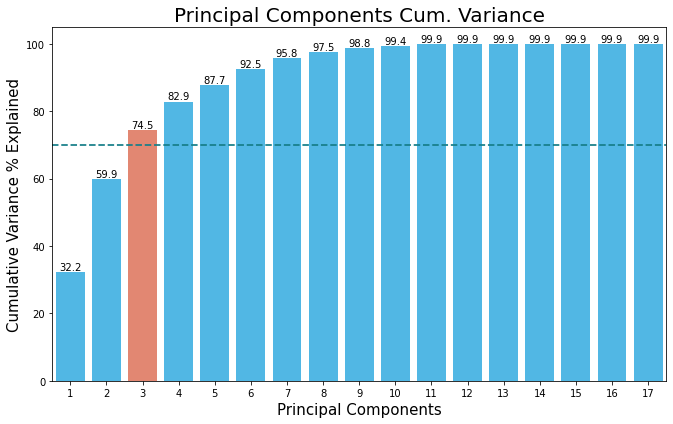

*********************************************************************************************************

Our 3 principal components:


array([[ 1.77067007, -0.06273376,  0.9067211 ],
       [ 0.41589738, -0.26556426,  0.26514403],
       [-0.21615943,  0.03967785,  0.48024651],
       ...,
       [ 0.35635928, -0.43661978, -0.60364831],
       [ 0.23867051, -0.37246686, -0.89085847],
       [ 1.35673523, -0.37143011, -0.30767482]])

In [17]:
# Now that we have our new dataset ready, we search the optimal number of principal components:

def pca_hw4(X, treshold = 70):
    
    # Part 1: Import the packages
    # --------------------------------------------------------------------------------------------------------------------------------------------

    from sklearn.decomposition import PCA                                                                                                        
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Part 2: We find the optimal number of components
    # --------------------------------------------------------------------------------------------------------------------------------------------

    n = len(X.axes[1]) # number of columns of X
    covar_matrix = PCA(n_components = n).fit(X)
  
    ## Variance explained for each of the principal components
    variance = covar_matrix.explained_variance_ratio_
    cumulative_var = np.cumsum( np.round(variance, decimals = 3) * 100 )

    ## Find the number of components you need to go over your treshold:
    num_components = len(cumulative_var) # default value
    for i in range(len(cumulative_var)):
        if cumulative_var[i] >= treshold:
            num_components = i+1
            break     

    # Part 3: Plot to find the number of principal components you need
    # --------------------------------------------------------------------------------------------------------------------------------------------

    tot_num_components = len(cumulative_var)
    
    x = [x for x in range(1, tot_num_components + 1)] # numbers from 1 to maximum number of components
    y = [var for var in cumulative_var] # value of the cumulative variance

    customized_col = ['#f57b5f' if c == num_components else '#38c1fc' for c in x]

    fig, ax = plt.subplots(figsize=(11, 6.5))

    ax.set_title('Principal Components Cum. Variance', fontsize = 20)
    ax.set_ylabel('Cumulative Variance % Explained', fontsize = 15)
    ax.set_xlabel('Principal Components', fontsize = 15)

    ax.axhline(treshold, color = '#177e89', linewidth = 1.75, linestyle = "--")

    sns.barplot(x, y, palette = customized_col) 
    ax.bar_label(ax.containers[0])
    plt.show()

    # Part 4: we perform the PCA with the chosen number of principal components
    # --------------------------------------------------------------------------------------------------------------------------------------------

    pca = PCA(n_components = num_components)
    principal_components = pca.fit_transform(X)

    # Part 5: Just the print of the dataframe containing the principal components
    # --------------------------------------------------------------------------------------------------------------------------------------------

    print('*' * 105)
    print('')
    print('Our', num_components, 'principal components:')

    return principal_components
    

pca = pca_hw4(X, treshold = 70)
pca

## 2.3: Clustering & K-means

### 2.3.1: K-Means from scratch

### 2.3.2: Find an optimal number of clusters

In [18]:
pca

array([[ 1.77067007, -0.06273376,  0.9067211 ],
       [ 0.41589738, -0.26556426,  0.26514403],
       [-0.21615943,  0.03967785,  0.48024651],
       ...,
       [ 0.35635928, -0.43661978, -0.60364831],
       [ 0.23867051, -0.37246686, -0.89085847],
       [ 1.35673523, -0.37143011, -0.30767482]])

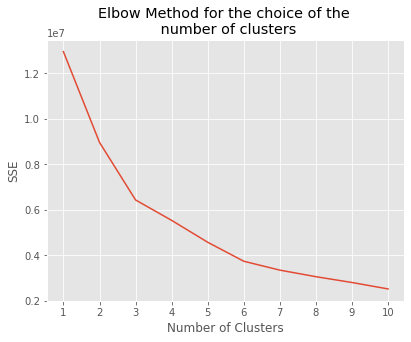

In [19]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# First Method for the choice of the optimal number of clusters: Elbow Method

kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca)
    sse.append(kmeans.inertia_)

plt.style.use("ggplot")
plt.figure(figsize = [6.4, 4.8])
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for the choice of the \n number of clusters")
plt.show()

In [22]:
import tqdm

In [46]:
# Second Method for the choice of the optimal number of clusters: Silhouette Score

# The Silhouette method is usually used togheter with the Elbow Method for a more precise decision.
# The Silhouette coefficient varies from -1 to +1: the closer it is to 1, the more accurate the cluster partitioning is.
# The advantage of this procedure is that it makes the choice of the number of clusters k more graphically clear (there is no elbow to look for in the graph...) and more accurate, but it has a major drawback. 
# In fact, in order to calculate this index, we need to calculate the coefficient for each of the possible values of k, and this substantially increases the computational complexity.

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
for num_clusters in range_n_clusters:
 kmeans = KMeans(n_clusters = num_clusters)
 kmeans.fit(pca)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(pca[1:100000], cluster_labels[1:100000]))
 print(num_clusters, '... ... done')

2 ... ... done
3 ... ... done
4 ... ... done
5 ... ... done
6 ... ... done


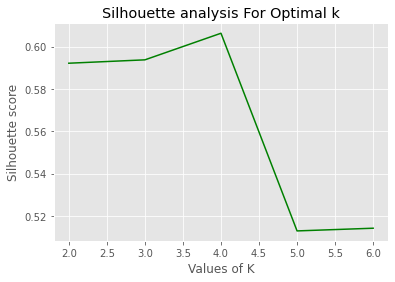

In [60]:
plt.plot(range_n_clusters, silhouette_avg, 'green')
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

We note that the silhouette index recommends choosing a number of clusters equal to k.
However, it can be seen that the index calculated in k=3 and k=4 is very similar. In addition, we used a sample of only 100000 units (just over 10% of the total) to calculate this score.
Therefore, also to make the algorithm computationally lighter in the next step, we choose to adopt a number of clusters equal to 3.

### 2.3.3: Algorithm on the data

In [296]:
# Now that we know how many clusters we need, we assign the labels:

#Initialize the class object
kmeans = KMeans(n_clusters= 3) #, init = 'k-means++', random_state=42
 
labels = kmeans.fit_predict(pca)
np.unique(labels)

array([0, 1, 2], dtype=int32)

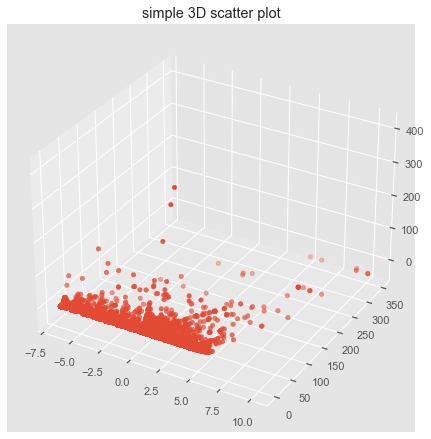

In [346]:
# Our points look like this:

pca_df = pd.DataFrame(pca)
pca_df = pca_df.set_axis(['1PC', '2PC', '3PC'], axis=1, inplace=False)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")
 
# Creating plot
ax.scatter3D(pca_df['1PC'], pca_df['2PC'], pca_df['3PC'])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

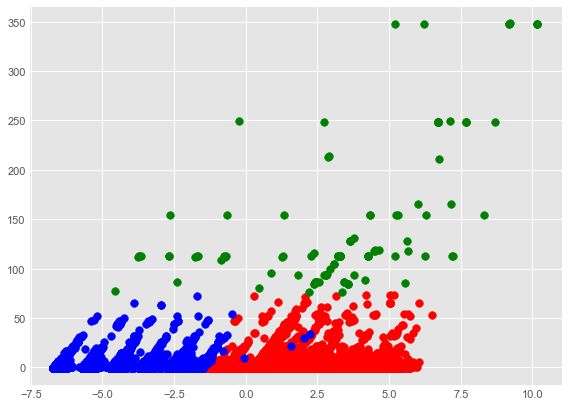

In [353]:
# Of course it's not easy to visualize almost 1 million points... se we will go for a 2D representation.

plt.figure(figsize=[8.5, 6.5])
plt.scatter(pca[labels==0, 0], pca[labels==0, 1], s=60, c='red')
plt.scatter(pca[labels==1, 0], pca[labels==1, 1], s=60, c='blue')
plt.scatter(pca[labels==2, 0], pca[labels==2, 1], s=60, c='green')

### 2.3.4: K-Means++

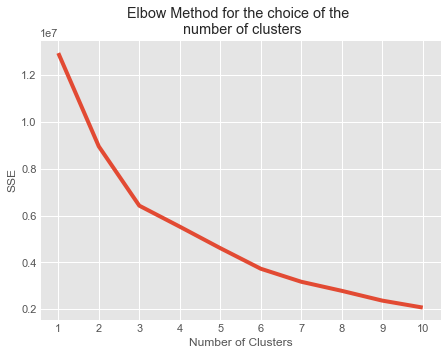

In [305]:
# Now we do the same thing using kmeans++

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(pca)
    sse.append(kmeans.inertia_)

plt.style.use("ggplot")
plt.figure(figsize = [6.4, 4.8])
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for the choice of the \n number of clusters")
plt.show()

In [306]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', random_state = 42) #, init = 'k-means++', random_state=42
 
labels = kmeans.fit_predict(pca)
np.unique(labels)

array([0, 1, 2], dtype=int32)

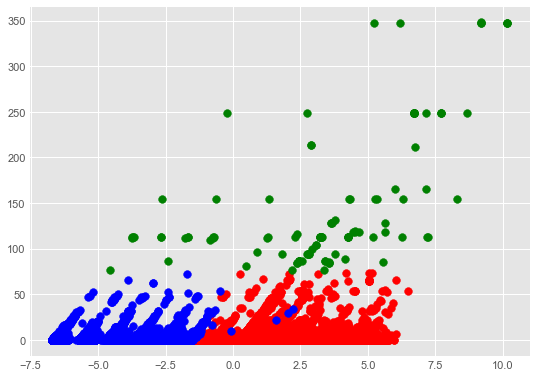

In [354]:
plt.figure(figsize=[8, 6])
plt.scatter(pca[labels==0, 0], pca[labels==0, 1], s=60, c='red')
plt.scatter(pca[labels==1, 0], pca[labels==1, 1], s=60, c='blue')
plt.scatter(pca[labels==2, 0], pca[labels==2, 1], s=60, c='green')

# Exactly the same

### 2.4 Analysing your results!

In [355]:
normalised_variables.columns.tolist()

['CustomerID',
 'Number_Transactions',
 'Number_Transactions>100',
 'Average_Amount_Transactions',
 'Average_Balance',
 'Utilisation',
 'CustGender',
 'CustLocation',
 'Max_Amount_Transactions',
 'Min_Amount_Transactions',
 'Customer_Age',
 'Max_%_Transaction',
 'Last_Transaction',
 'Last_Day_Transaction',
 'Minimum_Balance',
 'Number_Transactions>1000',
 'Last_Month_Transaction',
 'Maximum_Balance',
 'Minimum_utilisation',
 'Maximum_utilisation',
 'Percentile_Max_%_Transaction',
 'PercentileBalance',
 'Rich',
 'Minor',
 'Age_Status',
 'Poor',
 'Suspicious_Account',
 'Account_in_red']

### 2.4.1: Choice of the features

In [584]:
# Average_Balance  -> rich/poor
# Age_Status
# Average_Amount_Transactions
# Cust_Gender

# We have to categorise these variables. We perform this operation on the original variables, not the transformed ones.
# First, we create a copy of the dataset containing transformed variables:

data_small_2 = data_small.copy()

# Then we remove the +inf and -inf values, so that the lenght of this dataset will correspond to the lenght of the standardized dataset
data_small_2 = data_small_2.replace([np.inf, -np.inf], np.nan, inplace=False) 
data_small_2 = data_small_2.dropna()
#data_small_2.head()

# Now we select only the variables we are interested in:
data_small_2 = data_small_2[['Average_Balance', 'Age_Status', 'Average_Amount_Transactions', 'CustGender']]

# Notice: we will keep the Age_Status variable categorized in 3 gruops, not in 4, because otherwise there would be an imbalance due to a strong presence of people between 31 and 33 that would negatively impact the analysis 

# Finally we add the label of the cluster to each customer:
data_small_2['Label'] = labels

# A quick look
data_small_2.head()

,Average_Balance,Age_Status,Average_Amount_Transactions,CustGender,Label
0,76340.635,Young,2553.0,F,0
1,24204.490,Young,1499.0,M,0
2,100112.950,Young,727.5,F,0
3,496.180,Young,30.0,F,0
4,87058.650,Adult,5000.0,M,0


In [ ]:
# Pivot Table
# https://pandas.pydata.org/docs/user_guide/reshaping.html

In [585]:
# Before we categorize, look at the following two tables:

display(
    data_small_2.pivot_table(index=['Label'], columns=['CustGender'], aggfunc='mean'),
    '*' * 75,
    '*' * 75,
    data_small_2.pivot_table(index=['Label'], columns=['Age_Status'], aggfunc='mean')
)

# What immediately jumps out is that there does not seem to be a 'gender effect'.
# The difference between the two variables (and thus also in the cluster division...) seems to depend more on age!
# The older one gets, the larger the bank account grows, and consequently larger transactions can be made. For example, look at the difference in Average_Amount_Transactions between young and old, especially in the first two clusters: the ratio is almost 3:1!
# Viceversa, this difference is not evident if we divide customers by gender. We conclude that the gender of clients is not a discriminating variable.


Average_Amount_Transactions               Average_Balance  \
CustGender                           F             M               F   
Label                                                                  
0                          1564.694922   1372.473722    9.795951e+04   
1                          1634.694483   1477.415967    8.630168e+04   
2                          3288.924844  14819.501165    5.584985e+07   

                          
CustGender             M  
Label                     
0           1.030088e+05  
1           9.390705e+04  
2           4.629187e+07

'***************************************************************************'

'***************************************************************************'

Average_Amount_Transactions                            \
Age_Status                       Adult      Elderly        Young   
Label                                                              
0                          1819.593895  3277.148738  1018.815350   
1                          1967.037295  3394.677068  1072.404139   
2                         19206.286232  6655.795833  4164.166667   

           Average_Balance                              
Age_Status           Adult       Elderly         Young  
Label                                                   
0             1.447471e+05  3.402137e+05  5.424615e+04  
1             1.375119e+05  3.304308e+05  4.418432e+04  
2             4.950065e+07  4.867478e+07  4.661847e+07

### 2.4.2, 2.4.3, 2.4.4, 2.4.5: Categorization & Pivot Tables

In [586]:
# Now we have to categorise our variables. Age_status and Cust_Gender are already categorised, so we have to transform Average_balance and Average_Amount_Transactions.
# We need to divide into 4 categories, and we want to balance the dimension of each class we are going to create, in order not to introduce some sort of bias --> 200k for each class

# Part 1: categorize Average_balance

data_small_2.loc[(data_small_2['Average_Balance'] >= 0) & (data_small_2['Average_Balance'] <= 5500) , 'Average_Balance'] = 1
data_small_2.loc[(data_small_2['Average_Balance'] > 5500) & (data_small_2['Average_Balance'] <= 18000), 'Average_Balance' ] = 2
data_small_2.loc[(data_small_2['Average_Balance'] > 18000) & (data_small_2['Average_Balance'] <= 60000), 'Average_Balance' ] = 3
data_small_2.loc[data_small_2['Average_Balance'] > 60000, 'Average_Balance'] = 4

data_small_2['Average_Balance'] = data_small_2['Average_Balance'].astype('int')

# Part 2: categorize Average_Amount_Transactions

data_small_2.loc[(data_small_2['Average_Amount_Transactions'] >= 0) & (data_small_2['Average_Amount_Transactions'] <= 175) , 'Average_Amount_Transactions'] = 1
data_small_2.loc[(data_small_2['Average_Amount_Transactions'] > 175) & (data_small_2['Average_Amount_Transactions'] <= 450), 'Average_Amount_Transactions' ] = 2
data_small_2.loc[(data_small_2['Average_Amount_Transactions'] > 450) & (data_small_2['Average_Amount_Transactions'] <= 1100), 'Average_Amount_Transactions' ] = 3
data_small_2.loc[data_small_2['Average_Amount_Transactions'] > 1100, 'Average_Amount_Transactions'] = 4

data_small_2['Average_Amount_Transactions'] = data_small_2['Average_Amount_Transactions'].astype('int')

# So we set 1 for low balances and low average transactions, 4 for the high values end the middle numbers for middle values

In [520]:
data_small_2.head(10)

,Average_Balance,Age_Status,Average_Amount_Transactions,CustGender,Label
0,4,Young,4,F,0
1,3,Young,4,M,0
2,4,Young,3,F,0
3,1,Young,1,F,0
4,4,Adult,4,M,0
5,4,Young,3,F,0
6,1,Adult,3,M,1
7,4,Young,2,M,0
8,4,Young,2,M,0
9,4,Adult,4,M,0


In [610]:
# We now turn to calculating percentages in pivot tables.

#def pivot_table_percentage(dataset, group):
    #columns = dataset.columns.tolist()

    #group = dataset[group]

    #for col in columns:
        #for cat in np.unique(dataset[col]).tolist():
            #for gr in np.unique(dataset[col]).tolist():
                

##

pivot_table_cluster = []
pivot_table_gender1 = []
pivot_table_gender2 = []

for cluster in np.unique(data_small_2.Label).tolist():
    pivot_table_cluster.append(cluster)
    pivot_table_cluster.append(cluster)
    for gender in np.unique(data_small_2.CustGender).tolist():
        pivot_table_gender1.append(len( data_small_2[(data_small_2['Label'] == cluster) & (data_small_2['CustGender'] == gender)] ))
        pivot_table_gender2.append(gender)
        print( 'In cluster', cluster, 'there are', len( data_small_2[(data_small_2['Label'] == cluster) & (data_small_2['CustGender'] == gender)] ), gender )
        #print('So we create some new pivot tables')
        #print('')

print(pivot_table_cluster)
print(pivot_table_gender1)
print(pivot_table_gender2)

In cluster 0 there are 199958 F
In cluster 0 there are 448909 M
In cluster 1 there are 53230 F
In cluster 1 there are 134862 M
In cluster 2 there are 32 F
In cluster 2 there are 83 M
[0, 0, 1, 1, 2, 2]
[199958, 448909, 53230, 134862, 32, 83]
['F', 'M', 'F', 'M', 'F', 'M']


In [640]:
n_0 = len( data_small_2[data_small_2['Label'] == 0] ) 
n_1 = len( data_small_2[data_small_2['Label'] == 1] ) 
n_2 = len( data_small_2[data_small_2['Label'] == 2] )

f_0 = len( data_small_2[ (data_small_2['Label'] == 0) & (data_small_2['CustGender'] == 'F') ] ) 
m_0 = len( data_small_2[ (data_small_2['Label'] == 0) & (data_small_2['CustGender'] == 'M') ] )
f_1 = len( data_small_2[ (data_small_2['Label'] == 1) & (data_small_2['CustGender'] == 'F') ] ) 
m_1 = len( data_small_2[ (data_small_2['Label'] == 1) & (data_small_2['CustGender'] == 'M') ] )
f_2 = len( data_small_2[ (data_small_2['Label'] == 2) & (data_small_2['CustGender'] == 'F') ] ) 
m_2 = len( data_small_2[ (data_small_2['Label'] == 2) & (data_small_2['CustGender'] == 'M') ] )

piv_t_gender = pd.DataFrame([ [f_0/n_0, m_0/n_0], [f_1/n_1, m_1/n_1], [f_2/n_2, m_2/n_2]]).set_axis(['F', 'M'], axis=1, inplace=False) * 100

##############################################################################################################################################

y_0 = len( data_small_2[ (data_small_2['Label'] == 0) & (data_small_2['Age_Status'] == 'Young') ] ) 
a_0 = len( data_small_2[ (data_small_2['Label'] == 0) & (data_small_2['Age_Status'] == 'Adult') ] )
e_0  = len( data_small_2[ (data_small_2['Label'] == 0) & (data_small_2['Age_Status'] == 'Elderly') ] )

y_1 = len( data_small_2[ (data_small_2['Label'] == 1) & (data_small_2['Age_Status'] == 'Young') ] ) 
a_1 = len( data_small_2[ (data_small_2['Label'] == 1) & (data_small_2['Age_Status'] == 'Adult') ] )
e_1  = len( data_small_2[ (data_small_2['Label'] == 1) & (data_small_2['Age_Status'] == 'Elderly') ] )

y_2 = len( data_small_2[ (data_small_2['Label'] == 2) & (data_small_2['Age_Status'] == 'Young') ] ) 
a_2 = len( data_small_2[ (data_small_2['Label'] == 2) & (data_small_2['Age_Status'] == 'Adult') ] )
e_2  = len( data_small_2[ (data_small_2['Label'] == 2) & (data_small_2['Age_Status'] == 'Elderly') ] )

piv_t_age = pd.DataFrame([ [y_0/n_0, a_0/n_0, e_0/n_0], [y_1/n_1, a_1/n_1, e_1/n_1], [y_2/n_2, a_2/n_2, e_2/n_2]]).set_axis(['Young', 'Adult', 'Elderly'], axis=1, inplace=False) * 100

###############################################################################################################################################

display(piv_t_gender, '*'*35, piv_t_age)


,F,M
0,30.816485,69.183515
1,28.299981,71.700019
2,27.826087,72.173913


'***********************************'

,Young,Adult,Elderly
0,51.653112,46.580732,1.766155
1,52.207962,46.253961,1.538077
2,2.608696,40.000000,57.391304


### 2.4.6: Metrics to estimate clustering algorithm performance

# Ioannis

In [54]:
age_balance = data[['CustomerID', 'CustomerAge', 'CustAccountBalance']].groupby('CustomerID').last()

,CustomerAge,CustAccountBalance
CustomerID,,
C1010011,40,120180.54
C1010012,28,24204.49
C1010014,38,161848.76
C1010018,32,496.18
C1010024,57,87058.65
...,...,...
C9099836,32,133067.23
C9099877,26,96063.46
C9099919,29,5559.75


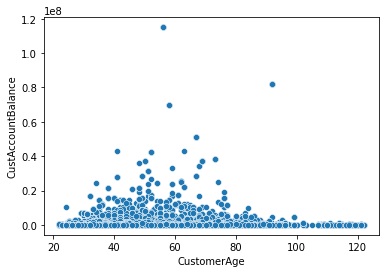

In [55]:
import seaborn as sns

sns.scatterplot(x = age_balance.CustomerAge, y = age_balance.CustAccountBalance)
age_balance

## Hierarchical Clustering

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

<AxesSubplot:xlabel='CustomerAge', ylabel='CustAccountBalance'>

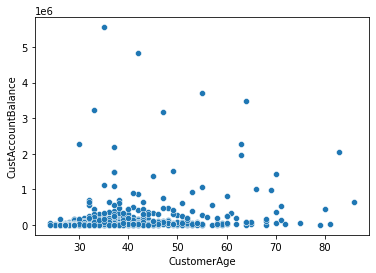

In [56]:
age_balance_sample = age_balance.sample(1000)

sns.scatterplot(x = age_balance_sample.CustomerAge, y = age_balance_sample.CustAccountBalance)

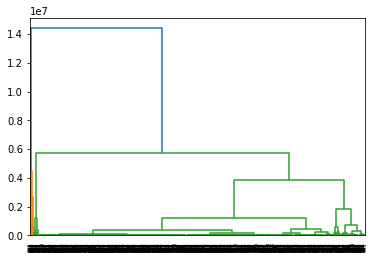

In [59]:
dend = dendrogram(linkage(age_balance_sample, method = 'ward'))

In [60]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage = 'single')

In [61]:
age_balance_sample['cluster'] = model.fit_predict(age_balance_sample)

unique_values = len(age_balance_sample.cluster.unique())

<AxesSubplot:xlabel='CustomerAge', ylabel='CustAccountBalance'>

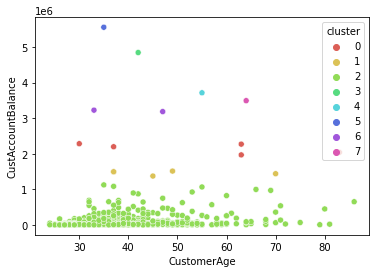

In [62]:
sns.scatterplot(x = age_balance_sample.CustomerAge, y = age_balance_sample.CustAccountBalance, hue = age_balance_sample.cluster, palette = sns.color_palette('hls', unique_values))

In [135]:
sns.color_palette('hls', 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [144]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [151]:
'''
# Now we use the entire dataset:

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage = 'single')

age_balance['cluster'] = model.fit_predict(age_balance)

unique_values = len(age_balance.cluster.unique())

sns.scatterplot(x = age_balance.CustomerAge, y = age_balance.CustAccountBalance, hue = age_balance.cluster, palette = sns.color_palette('hls', unique_values))
'''

In [ ]:
### Normalization

In [65]:
from sklearn import preprocessing

In [66]:
scaler = preprocessing.MinMaxScaler()

In [67]:
age_balance_norm = scaler.fit_transform(age_balance)

In [ ]:
# doesn't work, let's try with something else:

### Maximum amount

<AxesSubplot:xlabel='CustomerAge', ylabel='CustAccountBalance'>

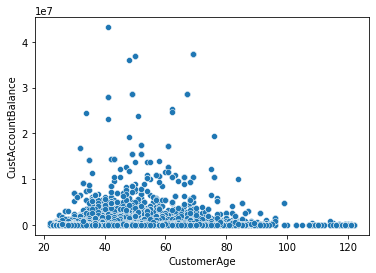

In [69]:
data.drop(data.loc[data['TransactionAmount (INR)'] > 500].index, axis = 0, inplace = True)

age_balance = age_balance = data[['CustomerID', 'CustomerAge', 'CustAccountBalance']].groupby('CustomerID').last()
age_balance_sample = age_balance.sample(1000)

sns.scatterplot(x=age_balance.CustomerAge, y=age_balance.CustAccountBalance)

# doesn't work

### Log of 

In [76]:
data['CustAccountBalanceLog'] = np.log10(data.CustAccountBalance)
data.loc[data['CustAccountBalanceLog'] == -np.inf, 'CustAccountBalanceLog'] = -1
age_balance = data[['CustomerID', 'CustomerAge', 'CustAccountBalanceLog']].groupby('CustomerID').last()

/Users/simonefacchiano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data.loc[]

In [80]:
age_balance = data[['CustomerID', 'CustomerAge', 'CustAccountBalanceLog']].groupby('CustomerID').last()
age_balance_sample = age_balance.sample(2000)

In [ ]:
model = AgglomerativeClustering(n_clusters = 8, affinity='euclidean', linkage = 'single')
age_balance_sample['cluster'] = model.fit_predict(age_balance_sample)

## Centroid-based clustering

In [82]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=8)
age_balance_sample['cluster'] = model.fit_predict(age_balance_sample)

<AxesSubplot:xlabel='CustomerAge', ylabel='CustAccountBalanceLog'>

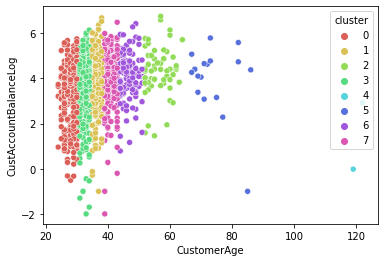

In [83]:
unique_values = len(age_balance_sample.cluster.unique())

sns.scatterplot(x=age_balance_sample.CustomerAge,
                y=age_balance_sample.CustAccountBalanceLog,
                palette=sns.color_palette('hls', unique_values),
                hue = age_balance_sample.cluster)

In [84]:
model.cluster_centers_

array([[ 28.51380042,   3.61106329],
       [ 36.36778846,   4.01898687],
       [ 56.25806452,   4.33053902],
       [ 32.4628483 ,   3.83825428],
       [120.5       ,   1.45421935],
       [ 73.61111111,   3.98888314],
       [ 46.3649635 ,   4.18768858],
       [ 40.55241935,   4.04894634]])

In [85]:
model.inertia_

7114.124750267791

In [87]:
import tqdm

sd = {}
for k in tqdm(range(10, 50)):
    model = KMeans(n_clusters = k)
    model.fit(age_balance_sample)
    sd[k] = model.inertia_

In [88]:
sd

{10: 5788.981141503041,
 11: 5191.531359437309,
 12: 4586.365055726127,
 13: 4047.2743595946426,
 14: 3642.4451455182652,
 15: 3279.3662781146613,
 16: 3010.2480502652325,
 17: 2775.9340461507923,
 18: 2598.2572790765716,
 19: 2407.932717887393,
 20: 2250.4008366806884,
 21: 2198.0171960172383,
 22: 2097.8692018178845,
 23: 2021.6899889006672,
 24: 1915.3722082587217,
 25: 1864.4868243126834,
 26: 1786.2421231264461,
 27: 1706.2092666173207,
 28: 1685.3987872821606,
 29: 1609.4721436857321,
 30: 1566.2352096061343,
 31: 1523.6807759997434,
 32: 1457.477750731793,
 33: 1385.6574210059325,
 34: 1378.498410081055,
 35: 1305.1598503084635,
 36: 1281.6803555164252,
 37: 1221.9309113602503,
 38: 1194.468758224564,
 39: 1166.4804059709736,
 40: 1147.0706693901475,
 41: 1123.9624240956875,
 42: 1075.5325853540664,
 43: 1041.6676415137874,
 44: 1014.554725883095,
 45: 994.2670945963102,
 46: 969.6583109026033,
 47: 941.8605418468674,
 48: 920.2964777135185,
 49: 905.1262657757654}

TypeError: 'str' object is not callable

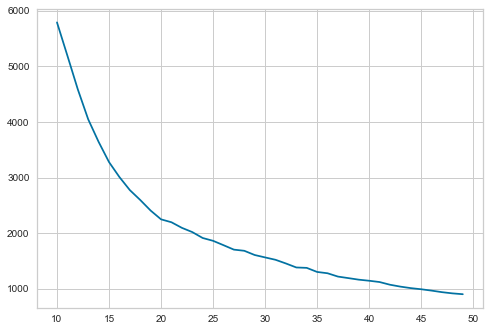

In [99]:
import matplotlib.pyplot as plt

plt.plot(list(sd.keys()), list(sd.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.title('Elbow method')
plt.show()

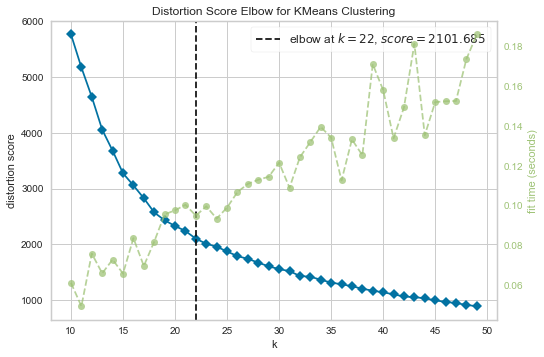

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
# Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (10, 50), methods = 'silhouette')

visualizer.fit(age_balance_sample)
visualizer.show()

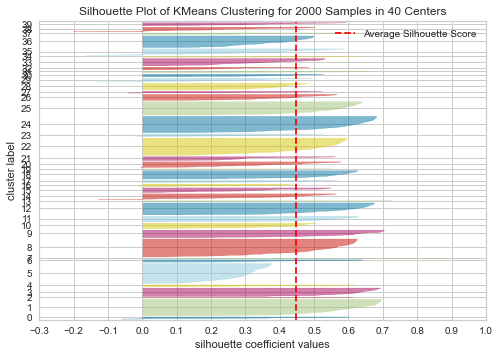

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 40 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [104]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(40, random_state=42)
visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')

visualizer.fit(age_balance_sample)
visualizer.show()

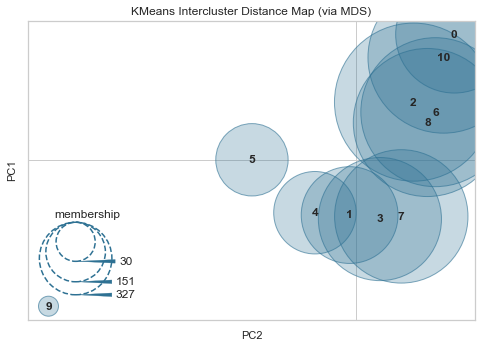

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [105]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(11)
visualizer = InterclusterDistance(model)

visualizer.fit(age_balance_sample)
visualizer.show()

### Multiple Features

In [107]:
age_balance = data['TransactionAmount (INR)', 'Customer Age', 'CustAccountBalanceLog'].groupby('CustomerID').mean()

KeyError: 'CustomerID'